In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Experiment 1: Nano heater

In [393]:
data = \
pd.read_csv('../COMSOL_results/Conductance_(h=400nm,omega=0).csv',
            sep=',',
            comment="%",
            names=['l','w','hydro','fourier'])

#data.hydro = data.hydro.str.replace('i','j').apply(np.complex)

ls = [0]+list(np.unique(data.l))
width = np.array(data.w[data.l==ls[-1]])
fourier = np.array(data.fourier[data.l==ls[-1]])
conductances = np.abs([fourier]+[data.hydro[data.l==l] for l in ls if l!=0])

In [394]:
IMP_MEASURE_RESOLUTION = 1E-2
WIDTH_RESOLUTION = 1E-1
IMP_0_RESOLUTION = .5E-1
IMP_RESOLUTION = (IMP_0_RESOLUTION**2 + IMP_MEASURE_RESOLUTION**2)**.5

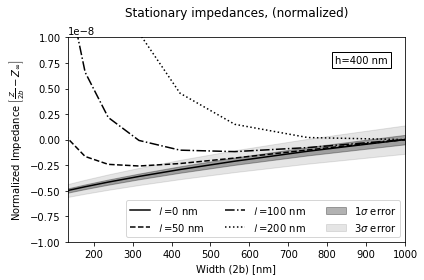

In [401]:
cut = -1
linestyles = ['-','--','-.',':']
for cond, l,linestyle in zip(conductances, ls,linestyles):
    plt.plot(width*1E9,(1/(cond)-1/cond[cut]),
             linestyle = linestyle, c='k',
             label='${\\mathcal{l}}$ =%g nm'%(l*1E9))
    

cond = conductances[0]
plt.fill_between(width*1E9,
                (1-IMP_RESOLUTION)/cond-1/cond[cut],
                (1+IMP_RESOLUTION)/cond-1/cond[cut], 
                 color='#000000',alpha = .3, label='$1\\sigma$ error')
plt.fill_between(width*1E9,
                (1-3*IMP_RESOLUTION)/cond-1/cond[cut],
                (1+3*IMP_RESOLUTION)/cond-1/cond[cut], 
                 color='#000000', alpha = .1, label='$3\\sigma$ error')
plt.text(820,.75E-8,'h=400 nm',
         bbox=dict(boxstyle="square",
                   ec='black',fc='white'))
plt.legend(ncol=3,loc=4)
plt.ylim([-1E-8,1E-8])
plt.xlim(1E9*width[[1,-1]])
plt.title('Stationary impedances, (normalized)\n')
plt.xlabel('Width (2b) [nm]')
plt.ylabel('Normalized Impedance $\\left[\\frac{Z}{2b}-Z_{\infty}\\right]$')
plt.tight_layout()
plt.savefig('../Plots/Stationary_impedances.png',dpi=300)

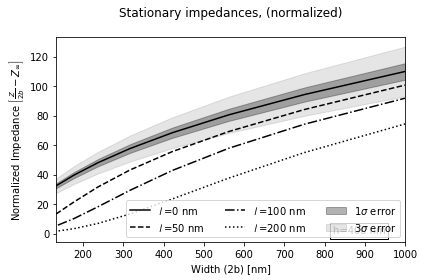

In [400]:
cut = -1
linestyles = ['-','--','-.',':']
for cond, l,linestyle in zip(conductances, ls,linestyles):
    plt.plot(width*1E9,((cond)*width),
             linestyle = linestyle, c='k',
             label='${\\mathcal{l}}$ =%g nm'%(l*1E9))
    

cond = conductances[0]
plt.fill_between(width*1E9,
                (1-IMP_RESOLUTION)*cond*width,
                (1+IMP_RESOLUTION)*cond*width, 
                 color='#000000',alpha = .3, label='$1\\sigma$ error')
plt.fill_between(width*1E9,
                (1-3*IMP_RESOLUTION)*cond*width,
                (1+3*IMP_RESOLUTION)*cond*width, 
                 color='#000000', alpha = .1, label='$3\\sigma$ error')
plt.text(820,.75E-8,'h=400 nm',
         bbox=dict(boxstyle="square",
                   ec='black',fc='white'))
plt.legend(ncol=3,loc=4)
#plt.ylim([-1E-8,1E-8])
plt.xlim(1E9*width[[1,-1]])
plt.title('Stationary impedances, (normalized)\n')
plt.xlabel('Width (2b) [nm]')
plt.ylabel('Normalized Impedance $\\left[\\frac{Z}{2b}-Z_{\infty}\\right]$')
plt.tight_layout()
plt.savefig('../Plots/Stationary_impedances.png',dpi=300)

In [470]:
no_minion = pd.read_csv('../COMSOL_results/No_Longer_Minion.csv',sep=',',
                        names="sensor_w,heater_w,l,hydro,fourier".split(','),
                       comment="%")
no_minion = no_minion[no_minion.sensor_w==1E-7]
no_minion

heater_w = no_minion.heater_w.unique()
l = no_minion.l.unique()
hydro_table = no_minion.pivot(index='heater_w',columns = 'l',values='hydro')


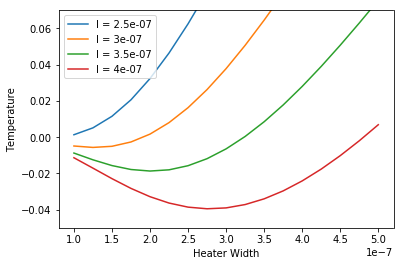

In [471]:
for x,li in zip(hydro_table.as_matrix().transpose()[-4:],l[-4:]):
    plt.plot(heater_w,x,label = "l = {}".format(li))
    
plt.ylim([-.05,.07])

plt.xlabel('Heater Width')
plt.ylabel('Temperature')

plt.legend()

In [472]:
import scipy.interpolate as interpolate
nw = np.linspace(1E-7,5E-7,200)
nhydrot = []
for x in hydro_table.as_matrix().transpose():
    nt = interpolate.interp1d(heater_w,x,kind='cubic')(nw)
    nhydrot.append(nt)
nhydrot=np.array(nhydrot)

fine_l = np.linspace(2.5E-7,4E-7,100)
fine_w = np.linspace(1E-7,5E-7,100)

nhydrot = interpolate.interp2d(nw,l,nhydrot,kind='cubic')(fine_w,fine_l)

fine_w_mesh,fine_l_mesh = np.meshgrid(fine_w,fine_l)

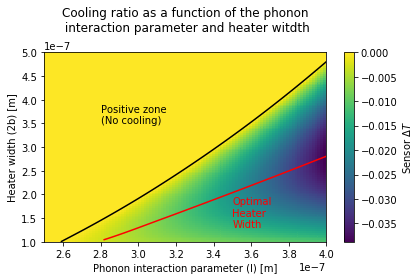

In [473]:
plt.pcolor(fine_l_mesh,fine_w_mesh,nhydrot,vmax=0)
plt.colorbar().set_label('Sensor $\Delta T$')

plt.contour(fine_l_mesh,fine_w_mesh,nhydrot,(0,),colors=('k',))

diff_w_mesh,diff_l_mesh = np.meshgrid(fine_w[1:],fine_l)
plt.contour(diff_l_mesh,diff_w_mesh,np.diff(nhydrot,axis=1),(0,),colors=('r',))

plt.text(2.8E-7,3.5E-7,'Positive zone\n(No cooling)')

plt.text(3.5E-7,1.3E-7,'Optimal\nHeater\nWidth',color='r')

plt.xlabel('Phonon interaction parameter (l) [m]')
plt.ylabel('Heater width (2b) [m]')

plt.title('Cooling ratio as a function of the phonon\n interaction parameter and heater witdth\n')
plt.tight_layout()
plt.savefig('../Plots/Stationary_cooling.png',dpi=300)